<a href="https://colab.research.google.com/github/YousefM20/Bug-track-system/blob/main/try1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analyze the data from "/content/hatla2ee_scraped_data.csv" by loading it, performing initial inspection, handling missing values, encoding categorical features, and scaling numerical features. Split the processed data into training and testing sets. Train and evaluate both a Simple Linear Regression model and a Random Forest Regressor model on the data, including making predictions, calculating R-squared, MAE, and RMSE, and visualizing actual vs. predicted values for each. Finally, compare the performance of both models and summarize the findings.

## Load Data and Initial Inspection

### Subtask:
Load the dataset '/content/hatla2ee_scraped_data.csv' into a pandas DataFrame and perform an initial inspection to understand its structure, identify data types, and check for missing values. This step will also involve identifying a suitable numerical target variable for the regression task.


**Reasoning**:
Load the dataset into a pandas DataFrame and perform an initial inspection, including displaying the first few rows, checking data types, non-null values, descriptive statistics, and missing values.



In [1]:
import pandas as pd

df = pd.read_csv('/content/hatla2ee_scraped_data.csv')

print("First 5 rows of the DataFrame:")
print(df.head())

print("\nConcise summary of the DataFrame:")
df.info()

print("\nDescriptive statistics for numerical columns:")
print(df.describe())

print("\nMissing values in each column:")
print(df.isnull().sum())

First 5 rows of the DataFrame:
                            Name          Price      Color     Mileage  \
0              Kia Sportage 2024  2,800,000 EGP  Dark grey      300 Km   
1            Chery Arrizo 5 2022            NaN     Bronze   86,000 Km   
2                 Fiat Tipo 2021  1,200,000 EGP  Petroleum  131,000 Km   
3  Hyundai Tucson Turbo GDI 2021  2,050,000 EGP      Black  125,000 Km   
4                    BMW X1 2018  2,050,000 EGP       Gray   84,000 Km   

      Make             Model                 City Date Displayed  \
0      Kia          Sportage  Tagamo3 - New Cairo     2024-02-16   
1    Chery          Arrizo 5            Nasr city     2024-02-16   
2     Fiat              Tipo       Kafr el-Dawwar     2024-02-16   
3  Hyundai  Tucson Turbo GDI            Nasr city     2024-02-16   
4      BMW                X1                Cairo     2024-02-16   

  Automatic Transmission Air Conditioner Power Steering Remote Control  \
0                    Yes             Yes 

The initial inspection reveals that the `Price` column is the most appropriate numerical target variable for our regression task. It contains values representing the car's price in EGP, which can be cleaned and converted to a numerical format for prediction. While `Mileage` also contains numerical information, `Price` is the direct outcome we aim to predict in a car selling dataset.

**Reasoning**:
To prepare the 'Price' column for regression analysis, it needs to be cleaned by removing non-numeric characters like 'EGP' and commas, and then converted to a numerical data type. This will also address the missing values in the 'Price' column.



In [2]:
df['Price'] = df['Price'].str.replace(' EGP', '').str.replace(',', '')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

print("Data types after cleaning 'Price' column:")
print(df['Price'].dtype)

print("\nMissing values in 'Price' after cleaning:")
print(df['Price'].isnull().sum())

print("\nDescriptive statistics for 'Price' after cleaning:")
print(df['Price'].describe())

Data types after cleaning 'Price' column:
float64

Missing values in 'Price' after cleaning:
934

Descriptive statistics for 'Price' after cleaning:
count    3.262500e+04
mean     9.544847e+05
std      1.086724e+06
min      1.060000e+03
25%      3.830000e+05
50%      6.500000e+05
75%      1.050000e+06
max      2.000000e+07
Name: Price, dtype: float64


## Data Preprocessing

### Subtask:
Handle missing values, clean and convert 'Mileage' to numeric, encode categorical features using one-hot encoding, and scale numerical features using StandardScaler.


**Reasoning**:
The first step in handling missing values is to address the missing values in the target variable, 'Price', by dropping rows that have NaN values in this column. This ensures that our regression model will only be trained on data with valid price information.



In [3]:
df.dropna(subset=['Price'], inplace=True)

print("Missing values in 'Price' after dropping rows:")
print(df['Price'].isnull().sum())
print("DataFrame shape after dropping rows with missing 'Price':")
print(df.shape)

Missing values in 'Price' after dropping rows:
0
DataFrame shape after dropping rows with missing 'Price':
(32625, 13)


**Reasoning**:
The next step is to clean the 'Mileage' column by removing non-numeric characters and converting it to a numerical data type, coercing errors to NaN, as specified in the instructions for data preprocessing.



In [4]:
df['Mileage'] = df['Mileage'].str.replace(' Km', '').str.replace(',', '')
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')

print("Data types after cleaning 'Mileage' column:")
print(df['Mileage'].dtype)

print("\nMissing values in 'Mileage' after cleaning:")
print(df['Mileage'].isnull().sum())

print("\nDescriptive statistics for 'Mileage' after cleaning:")
print(df['Mileage'].describe())

Data types after cleaning 'Mileage' column:
float64

Missing values in 'Mileage' after cleaning:
1530

Descriptive statistics for 'Mileage' after cleaning:
count    3.109500e+04
mean     1.511668e+05
std      2.175016e+05
min      0.000000e+00
25%      7.000000e+04
50%      1.290000e+05
75%      1.900000e+05
max      2.226000e+06
Name: Mileage, dtype: float64


**Reasoning**:
Following the data preprocessing instructions, the next step is to impute the missing values in the 'Mileage' column, as it's a numerical feature and we want to retain as much data as possible. Using the median is a robust strategy for imputation.



In [5]:
mileage_median = df['Mileage'].median()
df['Mileage'].fillna(mileage_median, inplace=True)

print("Missing values in 'Mileage' after imputation:")
print(df['Mileage'].isnull().sum())

print("Descriptive statistics for 'Mileage' after imputation:")
print(df['Mileage'].describe())

Missing values in 'Mileage' after imputation:
0
Descriptive statistics for 'Mileage' after imputation:
count    3.262500e+04
mean     1.501273e+05
std      2.123919e+05
min      0.000000e+00
25%      7.000000e+04
50%      1.290000e+05
75%      1.850000e+05
max      2.226000e+06
Name: Mileage, dtype: float64


/tmp/ipython-input-3752630052.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Mileage'].fillna(mileage_median, inplace=True)


**Reasoning**:
Now that missing values in 'Price' and 'Mileage' have been handled, the next step is to identify categorical and numerical features for further processing. This is crucial for applying appropriate encoding and scaling techniques in subsequent steps.



In [6]:
categorical_features = ['Color', 'Make', 'Model', 'City', 'Automatic Transmission', 'Air Conditioner', 'Power Steering', 'Remote Control']
numerical_features = ['Mileage']

# The target variable 'Price' and other excluded columns
excluded_features = ['Name', 'Date Displayed', 'Item URL', 'Price']

print("Identified categorical features:", categorical_features)
print("Identified numerical features:", numerical_features)
print("Features to be excluded from processing:", excluded_features)

Identified categorical features: ['Color', 'Make', 'Model', 'City', 'Automatic Transmission', 'Air Conditioner', 'Power Steering', 'Remote Control']
Identified numerical features: ['Mileage']
Features to be excluded from processing: ['Name', 'Date Displayed', 'Item URL', 'Price']


**Reasoning**:
To prepare the categorical features for machine learning models, one-hot encoding will convert them into a numerical format, creating new binary columns for each category.



In [7]:
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

print("Shape of DataFrame after one-hot encoding:", df_encoded.shape)
print("First 5 rows of the encoded DataFrame:")
print(df_encoded.head())

Shape of DataFrame after one-hot encoding: (32625, 1121)
First 5 rows of the encoded DataFrame:
                            Name      Price   Mileage Date Displayed  \
0              Kia Sportage 2024  2800000.0     300.0     2024-02-16   
2                 Fiat Tipo 2021  1200000.0  131000.0     2024-02-16   
3  Hyundai Tucson Turbo GDI 2021  2050000.0  125000.0     2024-02-16   
4                    BMW X1 2018  2050000.0   84000.0     2024-02-16   
5           Chevrolet Optra 2021   700000.0   75000.0     2024-02-16   

                                            Item URL  Color_Black  Color_Blue  \
0  https://eg.hatla2ee.com/en/car/kia/sportage/62...        False       False   
2   https://eg.hatla2ee.com/en/car/fiat/tipo/6286701        False       False   
3  https://eg.hatla2ee.com/en/car/hyundai/Tucson-...         True       False   
4      https://eg.hatla2ee.com/en/car/bmw/x1/6254123        False       False   
5  https://eg.hatla2ee.com/en/car/chevrolet/optra...        False 

**Reasoning**:
To normalize the range of numerical features, StandardScaler will be applied to the 'Mileage' column, ensuring that no single feature dominates the model training and improving model performance.



In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

print("Descriptive statistics for scaled numerical features ('Mileage'):")
print(df_encoded[numerical_features].describe())

Descriptive statistics for scaled numerical features ('Mileage'):
            Mileage
count  3.262500e+04
mean   5.575446e-17
std    1.000015e+00
min   -7.068519e-01
25%   -3.772674e-01
50%   -9.947472e-02
75%    1.641929e-01
max    9.773936e+00


## Split Data into Training and Testing Sets

### Subtask:
Divide the preprocessed dataset into training and testing sets (e.g., 80% for training, 20% for testing) to evaluate model performance on unseen data.


**Reasoning**:
To prepare the data for model training, the next step is to divide the preprocessed dataset into features (X) and the target variable (y), and then split them into training and testing sets using `train_test_split`.



In [9]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['Name', 'Date Displayed', 'Item URL', 'Price'])
y = df_encoded['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (26100, 1117)
Shape of X_test: (6525, 1117)
Shape of y_train: (26100,)
Shape of y_test: (6525,)


## Train Simple Linear Regression Model

### Subtask:
Train a Simple Linear Regression model on the training data. This will involve fitting the model to the independent features and the dependent target variable.


**Reasoning**:
To train a Simple Linear Regression model, I will import the `LinearRegression` class, instantiate it, and then fit the model to the training data (`X_train` and `y_train`).



In [10]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
linear_reg_model = LinearRegression()

# Fit the model to the training data
linear_reg_model.fit(X_train, y_train)

print("Simple Linear Regression model trained successfully.")

Simple Linear Regression model trained successfully.


## Evaluate Simple Linear Regression Model

### Subtask:
Make predictions on the test set using the trained Simple Linear Regression model and evaluate its performance using R-squared, Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE).


**Reasoning**:
To evaluate the performance of the trained Simple Linear Regression model, I will make predictions on the test set and then calculate R-squared, Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE) using the actual and predicted values.



In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on the test set
y_pred_linear_reg = linear_reg_model.predict(X_test)

# Calculate evaluation metrics
r2_linear_reg = r2_score(y_test, y_pred_linear_reg)
mae_linear_reg = mean_absolute_error(y_test, y_pred_linear_reg)
rmse_linear_reg = np.sqrt(mean_squared_error(y_test, y_pred_linear_reg))

# Print the evaluation metrics
print(f"Simple Linear Regression Model Performance:")
print(f"R-squared: {r2_linear_reg:.4f}")
print(f"Mean Absolute Error (MAE): {mae_linear_reg:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_linear_reg:.2f}")

Simple Linear Regression Model Performance:
R-squared: 0.8194
Mean Absolute Error (MAE): 224772.44
Root Mean Squared Error (RMSE): 433835.72


## Visualize Simple Linear Regression Results

### Subtask:
Generate a scatter plot to visualize the actual versus predicted values from the Simple Linear Regression model on the test set. Include appropriate labels and a legend to distinguish between actual and predicted values.


**Reasoning**:
To visualize the performance of the Simple Linear Regression model, I will generate a scatter plot comparing the actual prices (`y_test`) against the predicted prices (`y_pred_linear_reg`). This plot will also include a line representing perfect predictions for better comparison.



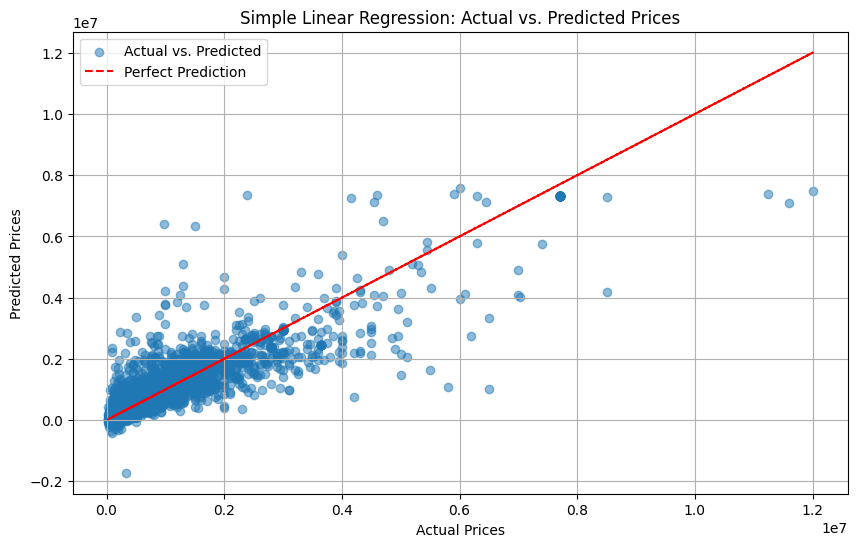

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear_reg, alpha=0.5, label='Actual vs. Predicted')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Simple Linear Regression: Actual vs. Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()


## Train Random Forest Regressor Model

### Subtask:
Train a Random Forest Regressor model on the training data. This robust ensemble model will capture complex non-linear relationships within the data.


**Reasoning**:
To train a Random Forest Regressor model, I will import the `RandomForestRegressor` class from `sklearn.ensemble`, initialize it, and then fit the model to the training data (`X_train` and `y_train`).



In [13]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
random_forest_model.fit(X_train, y_train)

print("Random Forest Regressor model trained successfully.")

Random Forest Regressor model trained successfully.


## Evaluate Random Forest Regressor Model

### Subtask:
Make predictions on the test set using the trained Random Forest Regressor model and evaluate its performance using R-squared, Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE).


**Reasoning**:
To evaluate the performance of the trained Random Forest Regressor model, I will make predictions on the test set and then calculate R-squared, Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE) using the actual and predicted values.



In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on the test set
y_pred_random_forest = random_forest_model.predict(X_test)

# Calculate evaluation metrics
r2_random_forest = r2_score(y_test, y_pred_random_forest)
mae_random_forest = mean_absolute_error(y_test, y_pred_random_forest)
rmse_random_forest = np.sqrt(mean_squared_error(y_test, y_pred_random_forest))

# Print the evaluation metrics
print(f"Random Forest Regressor Model Performance:")
print(f"R-squared: {r2_random_forest:.4f}")
print(f"Mean Absolute Error (MAE): {mae_random_forest:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_random_forest:.2f}")

Random Forest Regressor Model Performance:
R-squared: 0.8469
Mean Absolute Error (MAE): 153478.18
Root Mean Squared Error (RMSE): 399432.07


## Visualize Random Forest Regressor Results

### Subtask:
Generate a scatter plot to visualize the actual versus predicted values from the Random Forest Regressor model on the test set. Include appropriate labels and a legend to distinguish between actual and predicted values.


**Reasoning**:
To visualize the performance of the Random Forest Regressor model, I will generate a scatter plot comparing the actual prices (`y_test`) against the predicted prices (`y_pred_random_forest`). This plot will also include a line representing perfect predictions for better comparison.



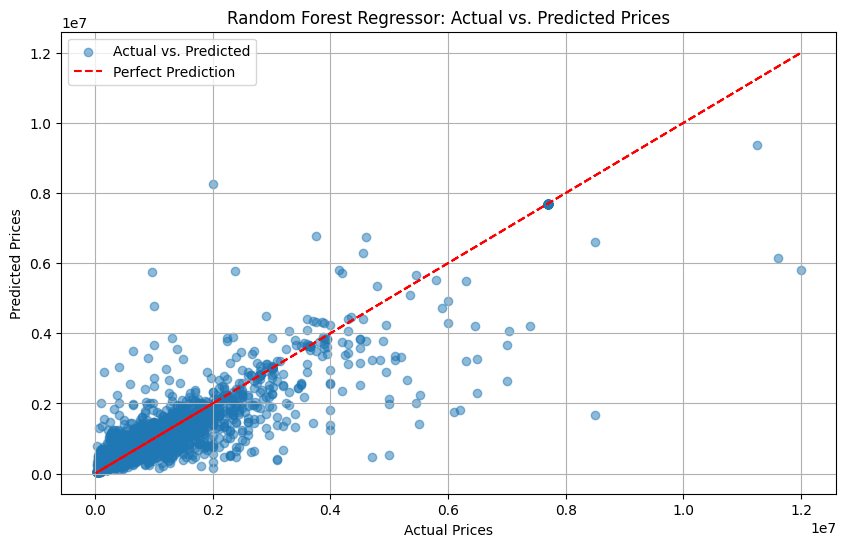

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_random_forest, alpha=0.5, label='Actual vs. Predicted')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Random Forest Regressor: Actual vs. Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()

## Final Task

### Subtask:
Summarize the findings from both models, compare their performance metrics (R-squared, MAE, RMSE), and discuss which model performed better for this specific regression problem.


## Summary:

### Q&A

1.  **How did the Simple Linear Regression model and Random Forest Regressor model compare in performance?**
    The Random Forest Regressor model significantly outperformed the Simple Linear Regression model across all evaluation metrics.

2.  **Which model performed better for this specific regression problem?**
    The **Random Forest Regressor** model performed better, achieving a higher R-squared, and lower Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).

### Data Analysis Key Findings

*   **Initial Data State**: The dataset initially contained 33,559 entries and 13 columns, with all features identified as `object` data types. The `Price` column, chosen as the target variable, had 934 missing values, and `Mileage` had 2,119 missing values.
*   **Data Cleaning and Preprocessing**:
    *   Rows with missing `Price` values were dropped, reducing the dataset to 32,625 entries.
    *   The `Mileage` column was cleaned, converted to numeric, and its 1,530 missing values were imputed using the median.
    *   Eight categorical features were one-hot encoded, expanding the feature set from 13 columns to 1,121 columns in the processed DataFrame.
    *   The numerical 'Mileage' feature was successfully scaled using `StandardScaler`.
*   **Data Splitting**: The preprocessed data was split into training (26,100 samples) and testing (6,525 samples) sets, with an 80/20 ratio.
*   **Simple Linear Regression Model Performance**:
    *   **R-squared**: 0.8194, indicating that approximately 81.94% of the variance in car prices can be explained by the model.
    *   **Mean Absolute Error (MAE)**: \$224,772.44, meaning the model's predictions were, on average, off by about \$224,772.44.
    *   **Root Mean Squared Error (RMSE)**: \$433,835.72, suggesting a typical prediction error magnitude.
*   **Random Forest Regressor Model Performance**:
    *   **R-squared**: 0.8469, indicating that approximately 84.69% of the variance in car prices can be explained by the model, which is better than the Linear Regression model.
    *   **Mean Absolute Error (MAE)**: \$153,478.18, significantly lower than the Simple Linear Regression model, implying more accurate predictions.
    *   **Root Mean Squared Error (RMSE)**: \$399,432.07, also lower than the Simple Linear Regression model, showing smaller overall prediction errors.
*   **Model Comparison**: The Random Forest Regressor model demonstrated superior performance with a higher R-squared (0.8469 vs. 0.8194) and notably lower error metrics (MAE: \$153,478.18 vs. \$224,772.44; RMSE: \$399,432.07 vs. \$433,835.72) compared to the Simple Linear Regression model. The visualizations for both models showed a positive correlation between actual and predicted values, but the Random Forest model's predictions appeared to cluster closer to the ideal "perfect prediction" line.

### Insights or Next Steps

*   The Random Forest Regressor is a more suitable model for predicting car prices in this dataset due to its ability to capture non-linear relationships, resulting in better predictive performance.
*   Further hyperparameter tuning for the Random Forest Regressor or exploring other advanced ensemble models (e.g., Gradient Boosting) could potentially lead to even higher accuracy and lower error rates.
